# <font color = blue>Finance and Risk Analytics for Portfolio Management</font>
### **Problem Statement:**
- In the recent past, the industry of wealth management has seen a lot of growth. Individuals and businesses actively seek maximum returns. However, in many cases, they lack either the skills to identify the right investment opportunities or the time to find such opportunities. 
- This challenge gave rise to the dedicated individuals who perform this task on behalf of the investors for a commission: portfolio managers. A **portfolio manager** makes investment decisions and carries out other related activities on behalf of vested investors.  
- They work with a team of analysts and researchers, and their main objective is to realize the needs of the investor and suggest a suitable portfolio that meets all the expectations. 
- They are responsible for establishing the best investment strategy and selecting appropriate investments with the right allocations. However, in doing so, they face a lot of competition in the form of other portfolio managers and rival firms. Therefore, the portfolio manager has to use the available resources to provide the best solution to the investor. 
- Your role requires you to analyze a portfolio of stocks to provide consultation on investment management based on client requirements. 

### **Obective:**
- To read, understand the dataset, and identify the issues if any and keep the dataset in the relevant forrmat.
- With the help of Exploratory Data Analysis analyyzze the patterns of stocks available in the dataset. 
- Which helps to understand stock's closing price, normalize closing price, daily returns, comparision with other stocks, their distibutions, and few more paramerters per the requirement of Portfolio Management.

### **Aim:** 
- Provide consultation to two different investors, **Mr. Patrick Jyenger** and **Mr. Peter Jyenger** based on their requirements and financial objectives. 

In [1]:
# To connect with the Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# To import necessaryy libraries
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy.stats import norm


In [4]:
# To set the Row, Column and Width of the Dataframe to show on Jupyter Notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


#Task 1: Preliminary Steps

### Data Importing

In [5]:
# To mention the directory path
directory_path = "/content/drive/MyDrive/Projects_to_be_done/Financial Risk Analysis/Dataset"


In [6]:
# Loading the Annexure file
annexure = pd.read_csv(directory_path + "/Annexure-I.csv" )


In [7]:
# Merging Healthcare & Pharmaceuticals into one
annexure.loc[annexure["Industry"] == "Healthcare","Industry"] = "Pharma"
annexure.loc[annexure["Industry"] == "Pharmaceuticals","Industry"] = "Pharma"

# Correcting a typo in Annexure file (There was an extra space before UNH) 
annexure.loc[annexure["Ticker"] == "UNH ","Ticker"] = "UNH"


In [8]:
# Mapping Industries to Companies

industries = ["Aviation","Finance","Pharma","Technology"]

i2c = {}

for i,ind in enumerate(industries):
  i2c[ind] = annexure[annexure["Industry"] == industries[i]]["Ticker"].to_list()


In [9]:
# To check the output
i2c["Pharma"][3] = "UNH"

i2c

{'Aviation': ['AAL', 'ALGT', 'ALK', 'DAL', 'HA', 'LUV'],
 'Finance': ['BCS', 'CS', 'DB', 'GS', 'MS', 'WFC'],
 'Pharma': ['JNJ', 'MRK', 'PFE', 'UNH', 'BHC', 'RHHBY'],
 'Technology': ['AAPL', 'AMZN', 'FB', 'GOOG', 'IBM', 'MSFT']}

In [10]:
# Create a function to map Companies with the Industries
def get_industry(comp):
  return (annexure[annexure.loc[:,"Ticker"] == comp]).loc[:,"Industry"]
  

In [11]:
# Collect stocks in a list
stocklist = [
    "AAL","ALGT","ALK","DAL","HA","LUV",
    "BCS","CS","DB","GS","MS","WFC",
    "BHC","JNJ","MRK","PFE","RHHBY","UNH",
    "AAPL","AMZN","FB","GOOG","IBM","MSFT"
    ]

In [12]:
# Importing all 25 csv files

datalist =  []

for industry in industries:
  for stock in i2c[industry]:
    globals()[stock.lower()+"_data"] = pd.read_csv( directory_path + "/" + industry + "/" + stock + ".csv")
    datalist.append(globals()[stock.lower()+"_data"])

snp500 = pd.read_csv( directory_path + "/S&P500.csv" )


In [13]:
# Check for null values
print("% null values for 24 stocks")

for st in datalist:
  n = st.shape[0]
  st = st.isnull().sum()
  # print(round(100*st['Date']/n,3),end=", ")
  print(round(100*st['Date']/n,3))
  

% null values for 24 stocks
0.0
0.277
0.277
0.277
0.277
0.277
0.258
0.258
0.258
0.258
0.258
0.258
0.317
0.317
0.317
0.317
0.317
0.317
0.0
0.277
0.331
0.277
0.277
0.277


### Inferences:
We can see that null values for stocks are very less (<1%). Therefore we can drop those rows which has null values.

In [14]:
# To drop the null values of all the dataset
for i,st in enumerate(datalist):
  datalist[i] = datalist[i].dropna()
  

In [15]:
# Adding StockName to each data frame
for i in range(len(datalist)):
  datalist[i].loc[:,"StockName"] = stocklist[i]
  datalist[i].loc[:,"Industry"] = get_industry(stocklist[i]).iloc[0]
  

#### Final cleaned dataset

In [16]:
# Merging all data and get final dataset
fra_df = pd.concat(datalist)


In [17]:
# To check all the variables label
fra_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,StockName,Industry
0,01-10-2010,9.29,9.39,9.21,9.29,8.758067,3603800.0,AAL,Aviation
1,04-10-2010,9.24,9.48,9.05,9.12,8.597802,3856800.0,AAL,Aviation
2,05-10-2010,9.27,9.35,9.15,9.23,8.701504,3896600.0,AAL,Aviation
3,06-10-2010,9.27,9.40,9.15,9.23,8.701504,3230200.0,AAL,Aviation
4,07-10-2010,9.30,9.31,9.07,9.24,8.710930,3877700.0,AAL,Aviation


In [18]:
# To check shape of the dataframe
fra_df.shape


(61125, 9)

In [19]:
# To get information about the data
fra_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61125 entries, 0 to 2516
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       61125 non-null  object 
 1   Open       61125 non-null  float64
 2   High       61125 non-null  float64
 3   Low        61125 non-null  float64
 4   Close      61125 non-null  float64
 5   Adj Close  61125 non-null  float64
 6   Volume     61125 non-null  float64
 7   StockName  61125 non-null  object 
 8   Industry   61125 non-null  object 
dtypes: float64(6), object(3)
memory usage: 4.7+ MB


In [20]:
# Checking the percentage of missing values
round(100*(fra_df.isnull().sum()/len(fra_df.index)), 2)


Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
StockName    0.0
Industry     0.0
dtype: float64

#### To save final cleaned dataset

In [21]:
# To get the final cleaned dataset in csv format
fra_df.to_csv(directory_path + "/clean_fra_df.csv" )


In [56]:
# To get the final cleaned dataset in excel format
fra_df.to_excel(directory_path + "/clean_fra_df.xlsx" )


# Task2: Data Exploration

In [22]:
# Assess data using StockName
def get_stock_data(name):
  data = fra_df[fra_df['StockName'] == name]
  return data


### Stock visualization

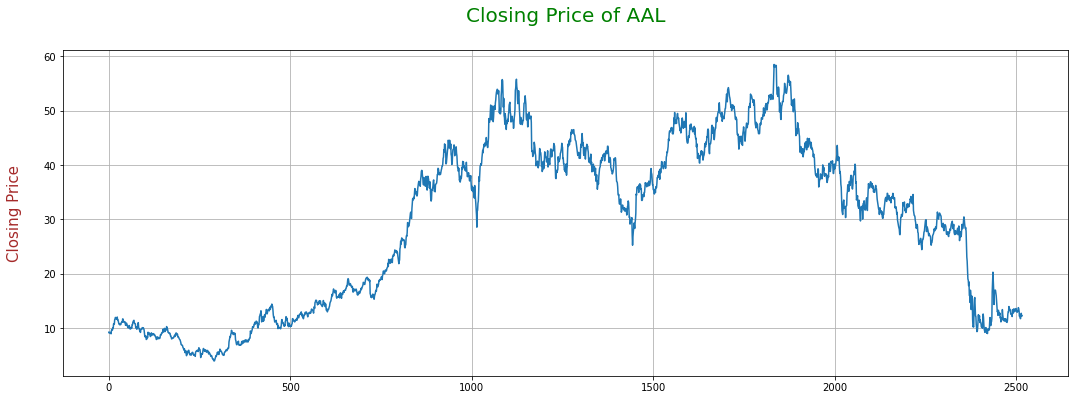

In [23]:
# To plot the closing price chart
def stock_visualization(stock):
  data = get_stock_data(stock)["Close"]

  plt.figure(figsize=(18,6)) 
  plt.plot(data)
  plt.title("Closing Price of " + stock + "\n",fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
  plt.ylabel("Closing Price\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
  plt.grid()
  plt.show()  

stock_visualization("AAL")


### Inferrences:
- As per the graph it is clear
that Closing Price of the
stock is always varied and
surprisingly it is following
normal distribution.

###Normalized data

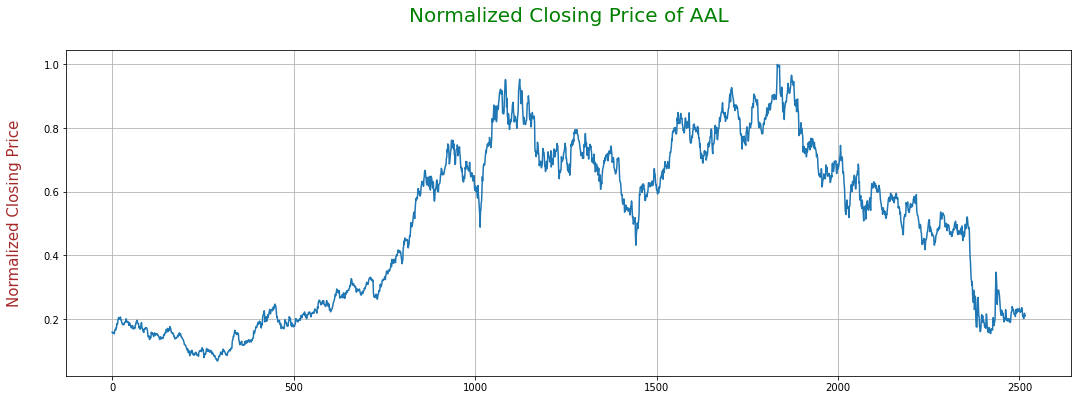

In [24]:
# Closing price normalised

def normalized_price(stock):
  data = get_stock_data(stock)["Close"]
  norm = [i/np.max(data) for i in data]

  plt.figure(figsize=(18,6)) 
  plt.plot(norm)
  plt.title("Normalized Closing Price of " + stock + "\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
  plt.ylabel("Normalized Closing Price\n", fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
  plt.grid()
  plt.show()  

normalized_price("AAL")


## Inferences:
- As per the graph it is clear that
Normalized Closing Price of the stock
also has almost the same pattern as
actual closing price

###Daily Returns

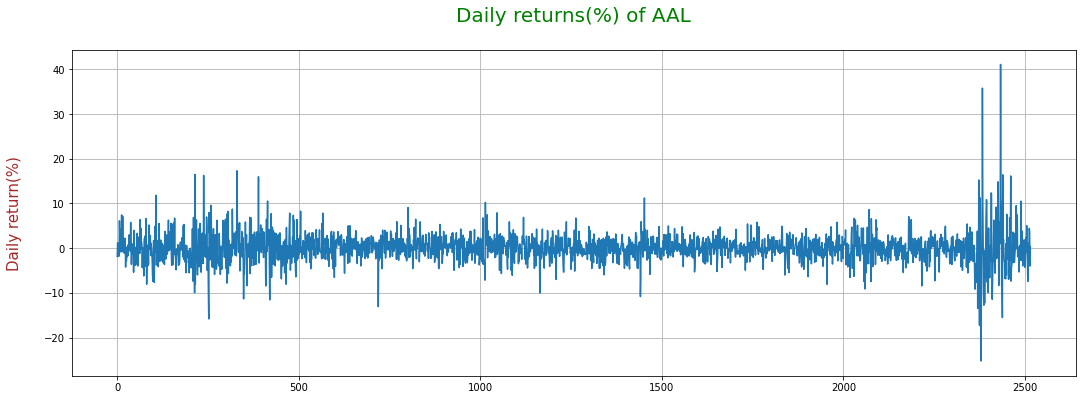

In [25]:
# To calculate the daily returns of a stock

def daily_returns(stock):
  data = get_stock_data(stock)

  size = get_stock_data(stock).shape[0]

  daily_returns = []
  for i in range(1,size):
    daily_returns.append(100*(data.iloc[i]["Close"] - data.iloc[i-1]["Close"])/data.iloc[i-1]["Close"])

  plt.figure(figsize=(18,6)) 
  plt.plot(daily_returns)
  plt.title("Daily returns(%) of " + stock + "\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
  plt.ylabel("Daily return(%)\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
  plt.grid()
  plt.show()  

daily_returns("AAL")


###Dispertion from mean

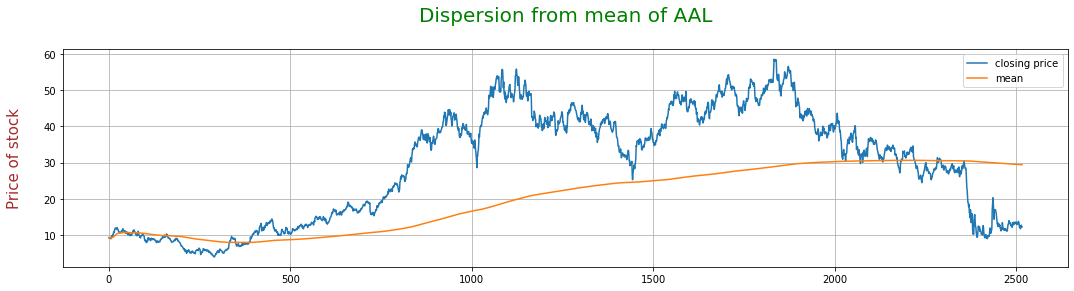

In [26]:
# To compare the Closing price of each day and moving average of a stock

def dispertion_from_mean(stock):
  data = get_stock_data(stock)

  size = data.shape[0]

  moving_mean = []
  cur_sum = 0

  for i in range(0,size):
    cur_sum += data.iloc[i]["Close"]
    mean = cur_sum/(i+1)
    moving_mean.append(mean)

  plt.figure(figsize=(18,4)) 
  plt.plot(get_stock_data("AAL")["Close"].to_list(),label="closing price")
  plt.plot(moving_mean,label="mean")
  plt.legend()
  plt.title("Dispersion from mean of " + stock + "\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
  plt.ylabel("Price of stock\n", fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
  plt.grid()
  plt.legend()
  plt.show()  

dispertion_from_mean("AAL")


### Inferences:
- This plot shows the Dispersion of
'AAL' stock closing price from the
mean. Which shows that for some values it is very close to the closing price of the stock. 
- Whereas, mostly closing price is higher than its' Mean. 
- At few points closing price is lower than the mean.

###Max and Min during specific period

In [27]:
# convert string date to datetime object

def to_date(d):
  return datetime.datetime.strptime(d, "%d-%m-%Y").date()
  

In [28]:
# function to calculate the max price and min price during a specified period

def max_min(st,end,stock):
  data = get_stock_data(stock)
  size = data.shape[0]

  strt_date = to_date(st)
  end_date = to_date(end)

  mx = mn = 0  
  for i in range(0,size):
    if to_date(data["Date"].iloc[i]) >= strt_date:
      mn = i
      break

  for i in range(mn,size):
    if to_date(data["Date"].iloc[i]) > end_date:
      mx = i
      break

  return data["Close"].iloc[mn:mx].max(axis = 0), data["Close"].iloc[mn:mx].min(axis = 0)

max, min = max_min("05-10-2010","05-11-2011","AAL")
print(f"Min. Price of a Stock : $ {min}")
print(f"Max. Price of a Stock : $ {max}")


Min. Price of a Stock : $ 4.63
Max. Price of a Stock : $ 12.07


###Risk/Volatility

In [29]:
# This calculates Risk/volatility of a stock by calculating variance of daily returns.

def volatility(stock):
  data = get_stock_data(stock)
  size = get_stock_data(stock).shape[0]

  daily_returns = []
  for i in range(0,size):
    daily_returns.append(100*(data.iloc[i]["Close"] - data.iloc[i-1]["Close"])/data.iloc[i-1]["Close"])

  return np.var(daily_returns)

vol = round(volatility("AAL"), 2)
print(f"Volatility of the stock is {vol}")


Volatility of the stock is 10.94


###Comparasion with other stock

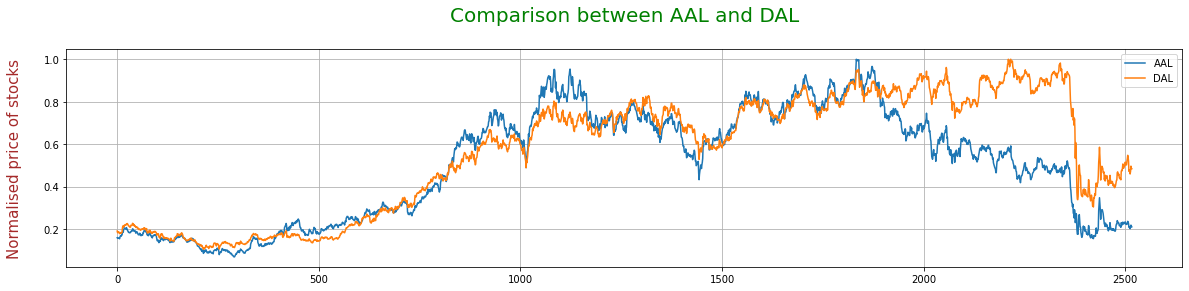

In [30]:
# This plots normalizes closing prices of 2 stocks

def get_comparasion(stock1,stock2):
  dr1 = get_stock_data(stock1)["Close"]
  dr2 = get_stock_data(stock2)["Close"]

  dr1n = [i/np.max(dr1) for i in dr1]
  dr2n = [i/np.max(dr2) for i in dr2]

  plt.figure(figsize=(20,4)) 
  plt.title(f"Comparison between {stock1} and {stock2}\n",fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
  plt.ylabel("Normalised price of stocks\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
  plt.grid()
  plt.plot(dr1n, label=stock1)
  plt.plot(dr2n, label=stock2)
  plt.legend()
  plt.show()
  
get_comparasion("AAL","DAL")


### Inferences:
- The attached line graph shows the
comparison of two different stocks
'AAL' and 'DAL' and we can say that
somewhere 'DAL' has higher closing
price than 'AAL'.

###Correlation analysis

In [31]:
# This calculates Correlation of any 2 given stocks

def get_correlation(stock1,stock2):
  data1 = get_stock_data(stock1)
  data2 = get_stock_data(stock2)
  
  dr1 = ((data1['Close'] - data1['Close'].shift(1))/data1['Close'].shift(1))[1:]
  dr2 = ((data2['Close'] - data2['Close'].shift(1))/data2['Close'].shift(1))[1:]

  return pearsonr(dr1,dr2)[0]

corr = round(get_correlation("AAL","DAL"), 2)
print(f"Correlation between stocks is {corr}")


Correlation between stocks is 0.79


###Visualizing Daily returns data

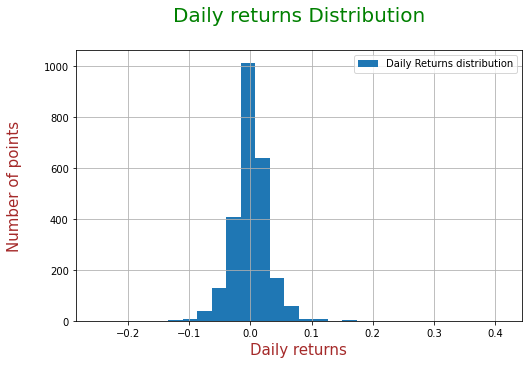

In [32]:
# This buckets the daily returns of a stock and plots a PDF

def prob_dist_daily_returns(stock):

  data = get_stock_data(stock)

  returns = ((data['Close'] - data['Close'].shift(1))/data['Close'].shift(1))[1:]

  plt.figure(figsize=(8,5)) 
  plt.hist(returns,bins="rice",label="Daily Returns distribution")
  plt.ylabel("Number of points\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
  plt.xlabel("Daily returns\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
  plt.title("Daily returns Distribution\n",fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
  plt.legend()
  plt.grid()
  plt.show()

prob_dist_daily_returns("AAL")


### Inerences:
- As per the attached Histogram Daily
return distribution for the selected
stock ('AAL') is tightly closed with
the center .

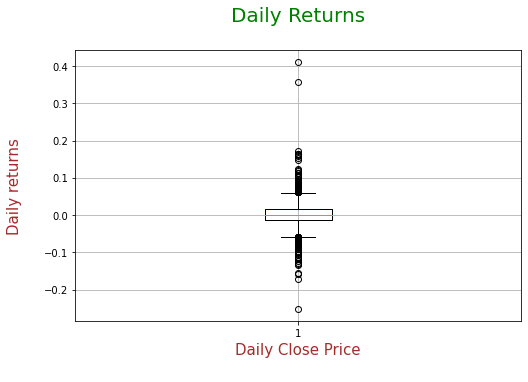

In [33]:
# This buckets the daily returns of a stock and plots a PDF

def box_plot_daily_returns(stock):

  data = get_stock_data(stock)

  returns = ((data['Close'] - data['Close'].shift(1))/data['Close'].shift(1))[1:]

  plt.figure(figsize=(8,5)) 
  # plt.boxplot(returns,labels=["Daily close price"])
  plt.boxplot(returns)
  plt.xlabel("Daily Close Price\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
  plt.ylabel("Daily returns\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
  plt.title("Daily Returns\n",fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
  plt.grid()
  plt.show()

box_plot_daily_returns("AAL")


### Inferences:
- Box plot shows the outliers, min,
max, and mean value for the
selected stock ('AAL').
- Here we can observe that very few times the daily returns of the stock is more than 0.2.


###Comparasion from normal distribution

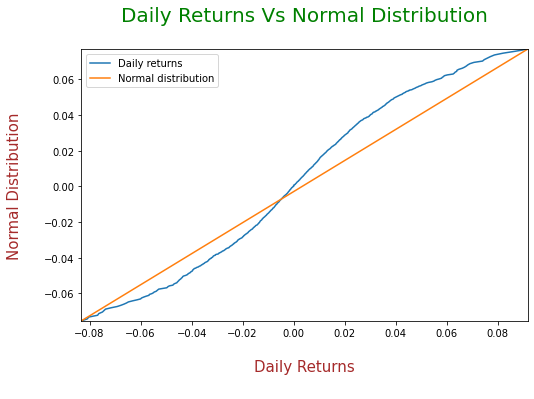

In [34]:
# This draws a plot that compares the distribution of stock price from gaussian normal distribution 

def comparasion_from_normal_dist(stock):

  data = get_stock_data(stock)

  returns = ((data['Close'] - data['Close'].shift(1))/data['Close'].shift(1))[1:]

  t = np.linspace(0.01,0.99,1000)
  q1 = np.quantile(returns,t)
  q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))


  plt.figure(figsize=(8,5)) 
  plt.plot(q1,q2,label="Daily returns")
  plt.plot([np.min(q1),np.max(q1)],[np.min(q2),np.max(q2)],label="Normal distribution")
  plt.xlim((np.min(q1),np.max(q1)))
  plt.ylim((np.min(q2),np.max(q2)))
  plt.xlabel("\nDaily Returns\n" ,fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
  plt.ylabel("Normal Distribution\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
  plt.title("Daily Returns Vs Normal Distribution\n",fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
  plt.legend()
  plt.show()

comparasion_from_normal_dist("AAL")


### Inferences:
- Here we can observe that the distribution of stock data is not much different from Gaussian normal distribution.


# Task 3: Stock Analysis and Portfolio Management

### Calculation of expected returns
- We will be using CAPM approach to calculate expected return after 5 years


**CAPM**


The Capital Asset Pricing Model (CAPM) is a model that describes the relationship between the expected return and risk of investing in a security. It shows that the expected return on a security is equal to the risk-free return plus a risk premium, which is based on the beta of that security.

### Utility Functions

In [35]:
# This functions calculates the beta value of a stock

def get_beta(stock):
  stockdata = get_stock_data(stock)["Close"]
  snp500data = snp500["Close"]

  stockdata = stockdata.pct_change().iloc[1:]
  snp500data = snp500data.pct_change().iloc[1:]
  len = 5*252
  beta, alpha = np.polyfit(snp500data[-len:], stockdata[-len:], 1)
  return beta

beta = round(get_beta("AAL"), 2)
print(f"Beta value = {beta}")


Beta value = 1.37


##### Given Risk Free Rate (Rf) = 0.75%

In [36]:
# This calculates expected % return of a stock with CAPM approach

def get_expected_return(stock):
  snp500data = snp500["Close"]
  snp500data = snp500data.pct_change().iloc[1:]
  snp500data = snp500data * 100
  len = 5*252
  snp500data = snp500data[-len:]
  rm = snp500data.mean() * 252

  beta = get_beta(stock)
  rf = 0.75 #given
  
  expected_return = rf + (beta * (rm-rf)) 
  return expected_return

# Given return %, this calculates return after 5 years
def return_5yrs(x,rate):
  return x*pow((100+rate)/100,5)


###Sharpe ratio calculation

- The Sharpe ratio compares the return of an investment with its risk. It's a mathematical expression of the insight that excess returns over a period of time may signify more volatility and risk, rather than investing skill.
- It adjusts the performance for the excess risk taken by an investor.
Higher Sharpe Ratio means greater returns from an investment at a higher level. - Thus, investors aiming to get higher returns will invest in funds that come with higher risk factors.
- In general higher the Sharpe ratio, the more attractive a portfolio is. A Sharpe ratio of 1 is good, 2 is even better and anything 3 or above is very good. But it all depends on the stock's volatility and portfolio return.
- Higher the volatility of the stock lower would be the Sharp Ratio.


In its simplest Mathematical form,
\begin{aligned} &\textit{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}\\ &\textbf{where:}\\ &R_{p}=\text{return of portfolio}\\ &R_{f} = \text{risk-free rate}\\ &\sigma_p = \text{standard deviation of the portfolio's excess return}\\ \end{aligned} 



In [37]:
# Function merging closing price of given stocknames into one dataframe

def merge_stocks(stockname):
  stocks = []
  for st in stockname:
    x = globals()[st+"_data"]
    x.set_index('Date')
    x = x.loc[:,['Date','Close']] 
    x['Date']= pd.to_datetime(x['Date'])
    stocks.append(x)

  selected_stocks = stocks[0].merge(stocks[1][['Date', 'Close']], on = 'Date', how = 'inner')
  selected_stocks.columns = ['Date',stockname[0],stockname[1]]
  selected_stocks = selected_stocks.merge(stocks[2][['Date', 'Close']], on = 'Date', how = 'inner')
  selected_stocks.columns = ['Date',stockname[0],stockname[1],stockname[2]]
  selected_stocks = selected_stocks.merge(stocks[3][['Date', 'Close']], on = 'Date', how = 'inner')
  selected_stocks.columns = ['Date',stockname[0],stockname[1],stockname[2],stockname[3]]
  selected_stocks = selected_stocks.merge(stocks[4][['Date', 'Close']], on = 'Date', how = 'inner')
  selected_stocks.columns = ['Date',stockname[0],stockname[1],stockname[2],stockname[3],stockname[4]]

  return selected_stocks
  

In [38]:
# Calculating sharpe ratio

def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma
    

In [39]:
# Calculating sharpe ratio for given stocks

def compute_sharpe_ratio(stocks):
  N = 252 #252 trading days in a year
  selected_stocks = merge_stocks([i[0].lower() for i in stocks])
  
  selected_stocks = selected_stocks.set_index('Date')
  selected_stocks = selected_stocks[-N*5:]
  port_df = selected_stocks.pct_change().dropna()
  # print(port_df.columns)
  # for st in port_df.columns:
  #   port_df[st] = port_df[st] * 100 

  rf = 0.0075 #0.75% risk free rate
  sharpes = port_df.apply(sharpe_ratio, args=(N,rf,),axis=0)
  print(sharpes)

  print("\n\nSharp Ratio Plotting")
  sharpes.plot.bar()


### Risk calculation 

In [40]:
# Calculates risks for given stocks

def calculate_risk(stocknames):
  risks = {}
  for st in stocknames:
    risks[st[0]] = round(volatility(st[0]),3)
  return risks
  

##Calculating expected return for every stock

In [41]:
# Calculating expected return for all 24 stocks

returns = {}

for stock in stocklist:
  er = round(get_expected_return(stock),2)
  returns[stock] = er
  # print(f"Expected return of {stock} : {er}%")

# sorting data based on values
returns = sorted(returns.items(), key=lambda x: x[1], reverse=True)


In [42]:
# % Return of all the 24 stocks
returns

[('MS', 19.29),
 ('RHHBY', 18.47),
 ('AAL', 18.19),
 ('ALGT', 17.4),
 ('CS', 17.36),
 ('DB', 17.26),
 ('GS', 17.21),
 ('ALK', 17.15),
 ('BCS', 16.87),
 ('HA', 16.61),
 ('DAL', 16.57),
 ('WFC', 16.43),
 ('MSFT', 15.98),
 ('AAPL', 15.52),
 ('FB', 14.26),
 ('LUV', 14.17),
 ('GOOG', 14.0),
 ('PFE', 13.78),
 ('IBM', 13.25),
 ('AMZN', 12.62),
 ('JNJ', 9.84),
 ('MRK', 9.82),
 ('BHC', 9.2),
 ('UNH', 8.78)]

##Mr. Patrick Jyenger's Portfolio

In [43]:
# investment in $
investment = 500000


In [44]:
# Select stocks that will give more that 2x returns
def select_stock():
  first_stock = 0
  while True:
    stocks = returns[first_stock:first_stock+5]
    sum = 0
    for st in stocks:
      sum += return_5yrs(20,st[1])
    # print(sum)
    if sum < 200:
      return first_stock-1
    else:
      first_stock += 1

first_stock = select_stock()


In [45]:
# % Return of stocks from first_stock to first_stock+5
stocks = returns[first_stock:first_stock+5]

for st in stocks:
  print(st[0],"",get_industry(st[0]).iloc[0], "", st[1])
  

WFC  Finance  16.43
MSFT  Technology  15.98
AAPL  Technology  15.52
FB  Technology  14.26
LUV  Aviation  14.17


In [46]:
# Calculating % return of the selected stocks

stocks = returns[first_stock:first_stock+5]
sum = 0
for st in stocks:
  sum += return_5yrs(investment/5,st[1])
print(f"{round(sum/investment,2)}x return")


2.04x return


### Inferences:
As % return is 2.04x, we can confirm that the capital investment could be nearrly doubled over 5 years.

In [47]:
# To get total value o the the investment
print(f"Capital after 5 years = $ {round(sum,2)}")


Capital after 5 years = $ 1018262.13


wfc    -0.345210
msft    1.233550
aapl    1.090475
fb      0.802277
luv     0.154108
dtype: float64


Sharp Ratio Plotting


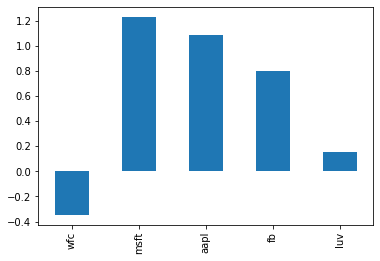

In [48]:
# Sharpe ratio calculation
selected_five = returns[first_stock:first_stock+5]
compute_sharpe_ratio(selected_five)


### Inferences:
- Attached Bar graph shows the Sharp Ratio of 5 different stocks which are analyzed for Mr. Patrick Jyengar.
- It shows that 'WFC' has negative Sharp Ratio.
- Whereas, 'MSFT', 'AAPL', 'FB', and 'LUV' has positie Sharp Ratio between 1.2 to 0.2. However, MSFT, AAPL, FB, and LUV are in decreasing order. 
- Sharp Ratio with more than 1 is Good.
- Here, the negative sharp ratio implies higher Risk Free Rate (Rf) than the portfolio's return for this stock.

In [49]:
# To calculates risk
port_risk = calculate_risk(selected_five)
print("Per stock risk")
print(port_risk)
print()

avg_risk = 0
for st in port_risk.items():
  avg_risk += st[1]

print(f"Average risk = {round(avg_risk/5,2)}")


Per stock risk
{'WFC': 3.453, 'MSFT': 5.703, 'AAPL': 6.455, 'FB': 9.021, 'LUV': 5.9}

Average risk = 6.11


### **Mr. Patrick Jyenger's Portfolio Summary** 

- Selected Stocks and their Industry/Sector: 

1. Aviation -- LUV, 
2. Finance -- WFC,
3. Technology -- MSFT, AAPL, FB.

- However, 'FB' stock from Technology has highest risk among all 5 stocks. 

- Whereas, 'WFC' from Finance sector has highest return among all the 5 stocks.

- Invested capital = $ 500000

- Capital after 5 years = $ 1018299.28

- Return after 5 years: 2.04x

- Average risk = 6.11

**Recommendation**: 
As per the the above analysis (based on the CAPM model) above mentioned stocks among all other stocks could **double his investment** with **low risk of 6.11**. Therefore, now Mr. Patrick can utilize this earned money for buying minority stake of **Naturo Magazine**.  

### Mr. Peter Jyenger's Portfolio

In [50]:
# investment in $
investment = 1000000


In [51]:
# taking stocks with top 5 returns
selected_five = returns[0:5]

for st in selected_five:
  print(st[0],"",get_industry(st[0]).iloc[0], st[1])

MS  Finance 19.29
RHHBY  Pharma 18.47
AAL  Aviation 18.19
ALGT  Aviation 17.4
CS  Finance 17.36


In [52]:
# Calculating return % selected stocks
sum = 0
for st in selected_five:
  sum += return_5yrs(investment/5,st[1])
print(f"{round(sum/investment,2)}x return")


2.3x return


In [53]:
# This is the highest return possible
print(f"Capital after 5 years = $ {round(sum,2)}")


Capital after 5 years = $ 2302412.25


ms       0.398525
rhhby    0.316332
aal     -0.163738
algt    -0.038443
cs      -0.322704
dtype: float64


Sharp Ratio Plotting


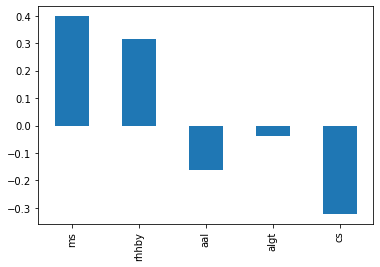

In [54]:
# Sharpe ratio calculation
compute_sharpe_ratio(selected_five)


### Inferences:
- Attached Bar graph shows the Sharp Ratio of 5 different stocks which are analyzed for Mr. Peter Jyengar.
- It shows that few stocks like 'CS', 'AAL', 'ALGT' has negative value sharp ratio. 
- Whereas 'MS' has highest Sharp Ratio and 'RHHBY' stock has 2nd highest Sharp Ratio with positive value of it.
- But for this portfolio out of 5, 3 stocks has Sharp Ratio < 1, therefore risk for this portfolio could also be high with higher expected returns.
- Lower value of Sharp Ratio for the stocks implies higher volatility of these stocks. 

In [55]:
# Calculates risk
port_risk = calculate_risk(selected_five)
print("Per stock risk")
print(port_risk)
print()

avg_risk = 0
for st in port_risk.items():
  avg_risk += st[1]

print(f"Average risk = {round(avg_risk/5,2)}")


Per stock risk
{'MS': 5.593, 'RHHBY': 14.446, 'AAL': 10.939, 'ALGT': 7.657, 'CS': 66.919}

Average risk = 21.11


### **Mr. Peter Jyenger Portfolio Summary**

- Selected Stocks and their Industry/Sector type: 

1. Aviation -- AAL, ALGT 
2. Finance -- MS, CS 
3. Pharma -- RHHBY

- However, 'CS'(Finance) stock has highest risk among all 5 stocks. 

- Whereas, one another stock 'MS' from Finance sector has highest return among all the 5 stocks.

- Invested capital = $ 1000000

- Capital after 5 years = $ 2302309.36

- Return after 5 years: 2.3x

- Average risk = 21.11 

**Recommendation**: 
As per the the above analysis (based on the CAPM model) of the various stocks above mentioned stocks could **double his investment** with very **high risk of 21.11**. Therefore, now Mr. Peter can utilize this fund in inorganic **expansion of JWW**.

## **Conclusion:**
- After Portfolio management for both the investor's, we can say that the Stocks we found for **Mr. Petrik** are giving **2.04 times return** in the next 5 years but with very **low risk (6.11)**. However, selected stocks for **Mr. Peter** are giving **2.3 times return** of his investment which is **nearly 1.13 times higher** than Mr. Petrik's stock but simultaneously the **Avg. Risk is nearly 15 times higher**.
- It means higher return may have higher risks.  

## **End of Capstone Project**